In [4]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from utils.cross_validation import cross_validate
from utils.estimators import DecisionTree
import utils.metrics as metrics
from utils.base_set import X_train, y_train, seed

In [2]:
# ej. 2.1
simple_model = DecisionTree(max_depth=3)

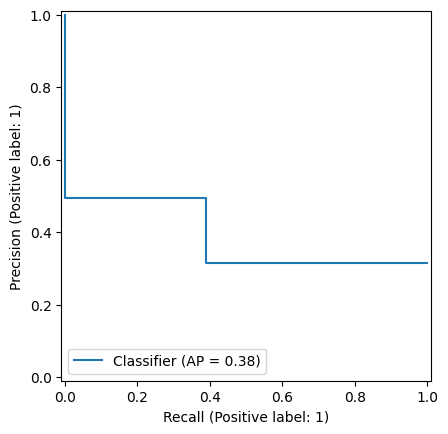

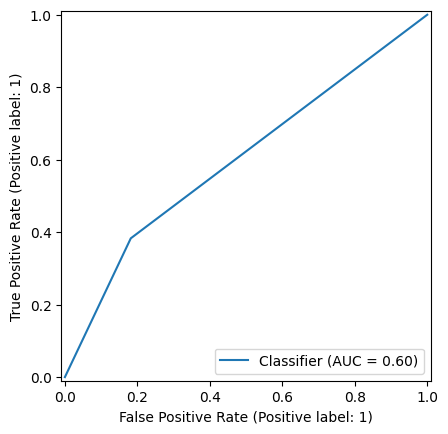

,mean_val,mean_train,tot_val,split_val_0,split_val_1,split_val_2,split_val_3,split_val_4,split_train_0,split_train_1,split_train_2,split_train_3,split_train_4
accuracy,0.690512,0.820720,0.690423,0.733333,0.655556,0.633333,0.700000,0.730337,0.832869,0.818942,0.824513,0.818942,0.808333
auprc,0.553831,0.757148,0.538552,0.587698,0.567352,0.554365,0.547534,0.512208,0.781987,0.754990,0.758927,0.752702,0.737133
aucroc,0.398794,0.243708,0.399420,0.379608,0.377304,0.393433,0.419446,0.424180,0.243956,0.215843,0.223739,0.260899,0.274103


In [3]:
# ej. 2.2
k = 5
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)
mxp = [
    (metrics.accuracy, None), 
    (metrics.auprc, PrecisionRecallDisplay), 
    (metrics.aucroc, RocCurveDisplay)
]
res = []
for metric, plotter in mxp:
    data, y_prob = cross_validate(simple_model, X_train, y_train, metric, False, cv)
    res.append(data)
    if plotter:
        plotter.from_predictions(y_train, y_prob)
        plt.show()
pd.concat(res)

In [ ]:
# ej. 2.3